<a href="https://colab.research.google.com/github/robitussin/CCADMACL_EXERCISES/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [325]:
import pandas as pd

In [326]:
df_original = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")
df_original = df_original.dropna()

In [327]:

df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")
df = df.dropna()
df = df.drop(columns=['show_id', 'date_added', 'description'])

In [328]:
df.sample(2)

,type,title,director,cast,country,release_year,rating,duration,listed_in
2622,Movie,Hard Lessons,Eric Laneuville,"Denzel Washington, Lynn Whitfield, Richard Mas...",United States,1986,TV-14,94 min,Dramas
7409,Movie,Very Big Shot,Mir-Jean Bou Chaaya,"Alain Saadeh, Fouad Yammine, Tarek Yaacoub, Al...","Lebanon, Qatar",2015,TV-MA,109 min,"Comedies, Dramas, International Movies"


In [329]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
targetcols = ['country', 'rating', 'type']
for tc in targetcols:
    label_encoded = encoder.fit_transform(df[tc])
    df[tc+"_label"] = label_encoded

In [330]:
df = df[~df['duration'].str.contains('Season|Seasons', case=False)]
df_original = df_original[~df_original['duration'].str.contains('Season|Seasons', case=False)]



In [331]:
import re
def convert_to_minutes(duration):
    if 'season' in duration or 'seasons' in duration:
        seasons = int(re.findall(r'\d+', duration)[0])
        return seasons * 500
    else:
        return int(re.findall(r'\d+', duration)[0])

# Apply the function to the 'duration' column
df['duration'] = df['duration'].apply(convert_to_minutes)

In [332]:

# df['duration'] = df['duration'].str.lower().str.replace('1 season', '500')

# df['duration'] = df['duration'].str.replace(r'\D', '', regex=True).astype(int)

In [333]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
df['listed_in'] = df['listed_in'].str.lower().str.replace(r",|movies|tv|shows|language"
, '', regex=True)
df['listed_in'] = df['listed_in'].str.replace('sci-fi & fantasy', 'scifi')
df['listed_in'] = df['listed_in'].str.replace('stand-up comedy', 'comedy')
df['listed_in'] = df['listed_in'].str.replace('comedies', 'comedy')
df['listed_in'] = df['listed_in'].str.replace('anime features', 'anime')


listed_in = vectorizer.fit_transform(df['listed_in'])
vectorizer.get_feature_names_out()
# print(len(listed_in.toarray()))
df_tmp = pd.DataFrame(listed_in.toarray() ,columns=vectorizer.get_feature_names_out())
df_tmp['title'] = df['title'].values


In [334]:
# from sklearn.discriminant_analysis import StandardScaler


new_df = df.join(df_tmp.set_index('title'), on='title')
# scaler = StandardScaler()
# new_new_df =new_df.drop(columns=[*targetcols, 'listed_in', 'cast', 'director', 'title', 'type'])
# scaler.fit(new_new_df)
# scaled_df = pd.DataFrame(scaler.transform(new_new_df),columns= new_new_df.columns )
# print("All features are now scaled")


In [335]:
scaled_df = new_df.drop(columns=[*targetcols, 'listed_in', 'cast', 'director', 'title', 'type'])
# unscaled.. scaling makes it have lower variance?

1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [336]:
# put your answer here
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_ds = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,4673.0,1.046123e-14,144.947738,-242.736702,-140.083562,-19.506658,128.151383,300.436804
col2,4673.0,4.087179e-15,25.743380,-92.479517,-13.770535,-1.460992,13.844788,144.656042
col3,4673.0,-1.602028e-14,9.306738,-17.941174,-5.174122,-2.536148,1.558970,77.605346


2. Create a scree plot for each principal component

Explained variance of PC1 0.9653358034438682
Explained variance of PC2 0.030449954909129683
Explained variance of PC2 0.003979701709167855


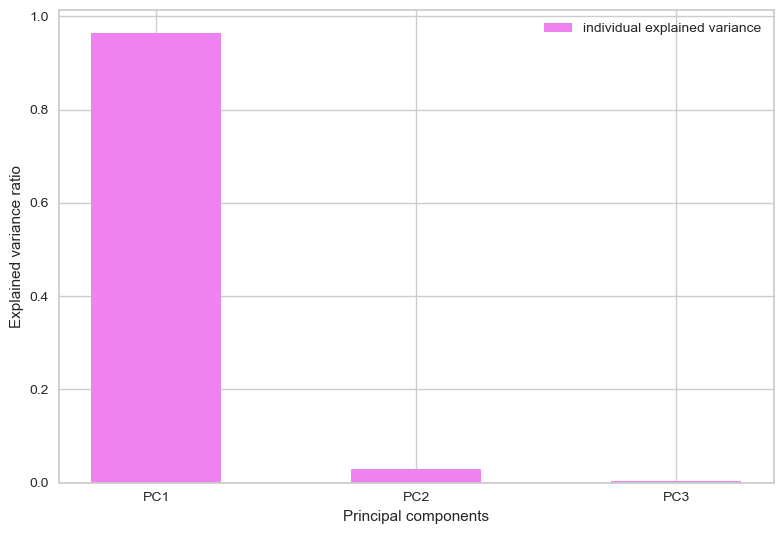

                      PC1        PC2           PC3
release_year     0.375776  -2.552479 -9.252972e+00
duration         6.562692  25.584550 -9.266979e-01
country_label -144.797730   1.151999 -6.703758e-02
rating_label     0.387166  -0.499043 -3.488571e-01
type_label      -0.000000  -0.000000  6.158683e-23
action           0.011752   0.060800  3.108449e-02
adventure        0.011752   0.060800  3.108449e-02
anime            0.005718  -0.005411  2.064362e-03
children        -0.028242  -0.058131  1.257342e-02
classic         -0.005032   0.018275  7.823275e-02
comedy          -0.011125  -0.052278  1.623450e-02
cult            -0.003524   0.003391  2.346982e-02
documentaries   -0.035206  -0.046609 -7.686452e-03
dramas           0.091235   0.162109 -2.656727e-02
faith           -0.003833   0.002061 -3.965448e-03
family          -0.028242  -0.058131  1.257342e-02
horror          -0.017272  -0.008619 -5.149640e-03
independent     -0.010041  -0.007032 -2.623147e-02
international    0.302484   0.1

In [337]:
# put your answer here
import matplotlib.pyplot as plt
import numpy as np
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC2_explainedvariance = explained_variance[2]
print("Explained variance of PC2", PC2_explainedvariance)
plt.figure()
principalcomponents = ['PC1', 'PC2', 'PC3']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.columns)

print(loading_matrix)

3. Use any clustering algorithm to create clusters

Elbow Method to determine the number of clusters to be formed:


c:\Users\rainn\miniconda3\envs\mainenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rainn\miniconda3\envs\mainenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rainn\miniconda3\envs\mainenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rainn\miniconda3\envs\mainenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init

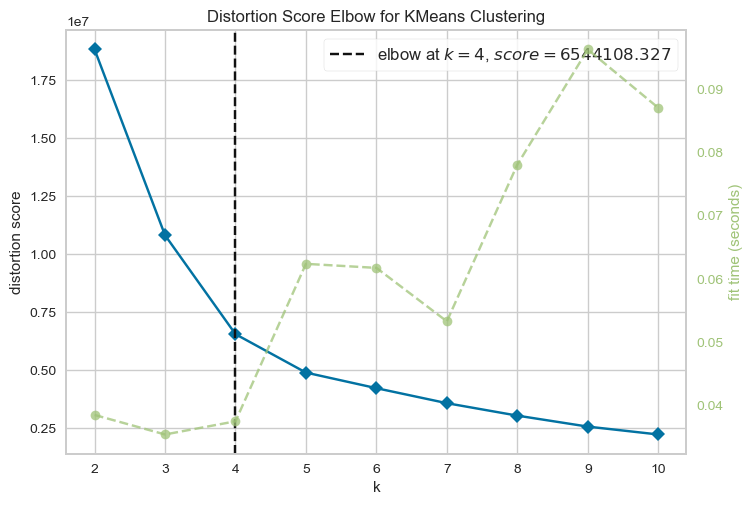

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [338]:
# put your answer here
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
PCA_ds = pd.DataFrame(pca.fit_transform(scaled_df), columns=(["col1","col2"]))

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [339]:
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto')
kmeans.fit(PCA_ds)
kmeans.inertia_


6544122.071576962

In [340]:
df_original['cluster'] = kmeans.labels_


In [341]:
df_original.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
7506,s7507,Movie,We Have Always Lived in the Castle,Stacie Passon,"Taissa Farmiga, Alexandra Daddario, Crispin Gl...",United States,"October 1, 2020",2018,TV-14,95 min,"Dramas, Thrillers",The fragile and secretive world of two sisters...,2
2816,s2817,Movie,Hostiles,Scott Cooper,"Christian Bale, Rosamund Pike, Wes Studi, Jess...",United States,"August 15, 2018",2017,R,134 min,Dramas,"After a long career battling the Cheyenne, a U...",2
6319,s6320,Movie,The Dukes of Hazzard,Jay Chandrasekhar,"Johnny Knoxville, Seann William Scott, Jessica...",United States,"January 1, 2020",2005,PG-13,104 min,"Action & Adventure, Comedies",The Duke boys are back in this comedy based on...,2
5632,s5633,Movie,Singularity,Robert Kouba,"Julian Schaffner, John Cusack, Jeannine Wacker...","Switzerland, United States","June 1, 2018",2017,PG-13,92 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy",Nearly a century after artificial intelligence...,0
5780,s5781,Movie,St. Agatha,Darren Lynn Bousman,"Sabrina Kern, Carolyn Hennesy, Courtney Halver...",United States,"August 8, 2019",2018,TV-MA,103 min,"Horror Movies, Independent Movies","Unwed and pregnant, a young woman flees her ab...",2
7479,s7480,Movie,War Machine,David Michôd,"Brad Pitt, Topher Grace, Emory Cohen, John Mag...",United States,"May 26, 2017",2017,TV-MA,123 min,"Comedies, Dramas",When a proud general is tasked with winning an...,2
5159,s5160,Movie,Rememory,Mark Palansky,"Peter Dinklage, Julia Ormond, Martin Donovan, ...","United Kingdom, United States, Canada","June 1, 2020",2017,PG-13,112 min,"Dramas, Sci-Fi & Fantasy",A psychologist is murdered after unveiling a b...,2
6915,s6916,Movie,The Super Parental Guardians,Joyce Bernal,"Vice Ganda, Coco Martin, Onyok Pineda, Awra Br...",Philippines,"March 21, 2019",2016,TV-14,115 min,"Action & Adventure, Comedies, International Mo...","Following his best friend's death, Arci takes ...",0
6354,s6355,Movie,The First Temptation of Christ,Rodrigo Van Der Put,"Gregorio Duvivier, Fábio Porchat, Antonio Tabe...",Brazil,"December 3, 2019",2019,TV-MA,46 min,"Comedies, International Movies","Jesus, who's hitting the big 3-0, brings a sur...",1
4345,s4346,Movie,My Own Man,David Sampliner,David Sampliner,United States,"March 6, 2015",2015,TV-MA,82 min,Documentaries,When a man discovers he will be the father to ...,2


4. Profile each cluster that you have generated based on your experiments

<Axes: xlabel='col1', ylabel='col2'>

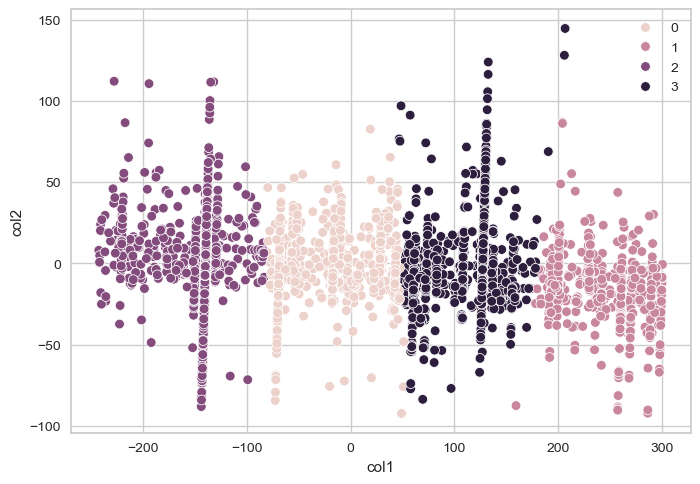

In [342]:
# put your answer here
import seaborn as sns

sns.scatterplot(data = PCA_ds, x = 'col1', y = 'col2', hue = kmeans.labels_)

In [ ]:
scaled_df.columns

Index(['release_year', 'duration', 'country_label', 'rating_label',
       'type_label', 'action', 'adventure', 'anime', 'british', 'children',
       'classic', 'comedy', 'crime', 'cult', 'documentaries', 'docuseries',
       'dramas', 'faith', 'family', 'horror', 'independent', 'international',
       'kids', 'korean', 'lgbtq', 'music', 'musicals', 'mysteries', 'nature',
       'reality', 'romantic', 'science', 'scifi', 'series', 'spanish',
       'spirituality', 'sports', 'talk', 'teen', 'thrillers'],
      dtype='object')

In [299]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
ar_list = ['rating_label', 'duration_label', 'country_label']
# for i in ar_list:
#     print(i, end=', \n')
scaled_df.columns

Index(['release_year', 'duration', 'country_label', 'rating_label',
       'type_label', 'action', 'adventure', 'anime', 'british', 'children',
       'classic', 'comedy', 'crime', 'cult', 'documentaries', 'docuseries',
       'dramas', 'faith', 'family', 'horror', 'independent', 'international',
       'kids', 'korean', 'lgbtq', 'music', 'musicals', 'mysteries', 'nature',
       'reality', 'romantic', 'science', 'scifi', 'series', 'spanish',
       'spirituality', 'sports', 'talk', 'teen', 'thrillers'],
      dtype='object')

rating_label


<Figure size 800x550 with 0 Axes>

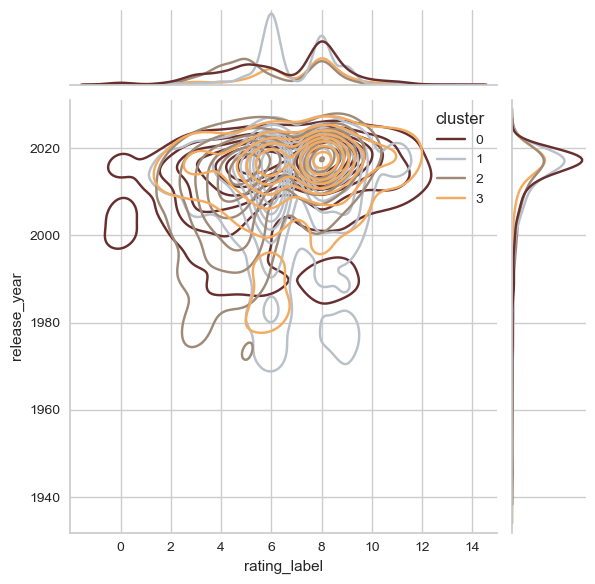

duration_label


<Figure size 800x550 with 0 Axes>

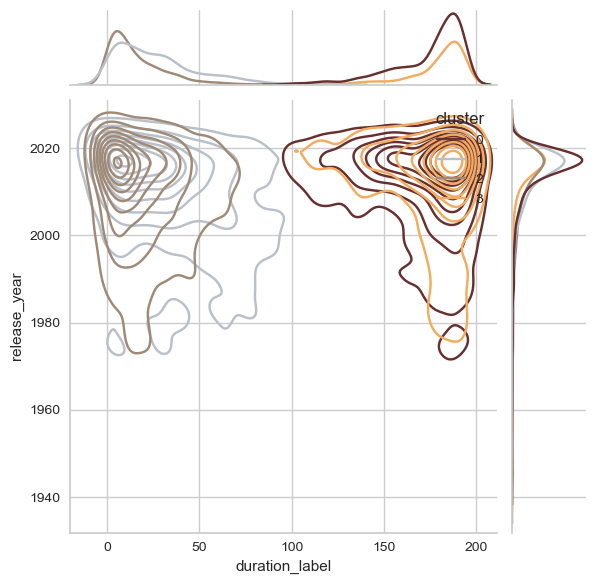

country_label


<Figure size 800x550 with 0 Axes>

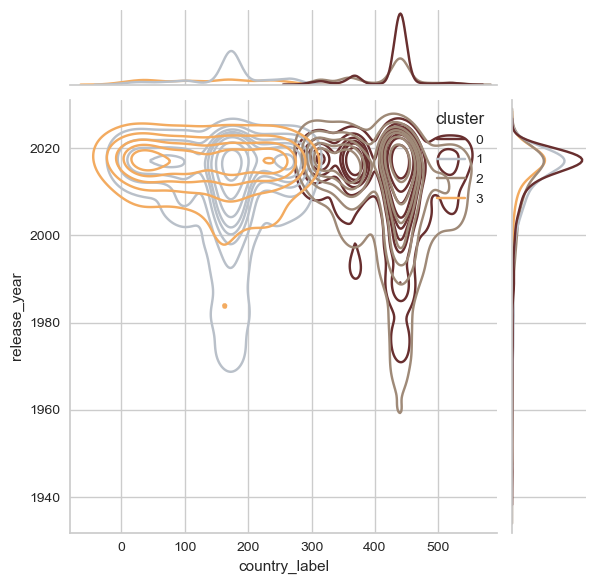

In [252]:

for i in ar_list:
    print(i)
    plt.figure()
    sns.jointplot(x=scaled_df[i], y=scaled_df["release_year"], hue =df_original["cluster"], kind="kde", palette=pal)
    plt.show()